In [1]:
##########################
# 配置运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import Math, Latex
from matplotlib import pyplot
import seaborn as sns

# matplotlib 对中文的支持
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文

# 保存为 pdf 格式
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8,5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 设置 numpy 的输出精度, 并且阻止使用科学记数法
np.set_printoptions(precision=6, suppress=True)

# 正态模型

## 1 正态分布数据集

### 小麦产量试验

1910 年，Mercer 和 Hall 在英国的 Rothamsted 实验站 (建立于 1843 年，号称世界上最古老的农业实验站) 进行了小麦产量试验，目的是测量无机和有机肥料对作物产量的影响。该实验将种子随机播撒在一块划分成 $20 \times 25$ 个小块的田地上，并且后期对整个田地进行相同的浇水施肥作业。总共收集到 500 个小麦产量数据。小麦产量呈正态分布。

In [37]:
from scipy.stats import norm

wheat_data = pd.read_csv('data/小麦产量数据.csv')
wheat_data.rename(columns={'wheat yield (unit: bushels)': 'yield'}, inplace=True)
wheat_data.head()

,yield
0,3.63
1,4.07
2,4.51
3,3.90
4,3.63


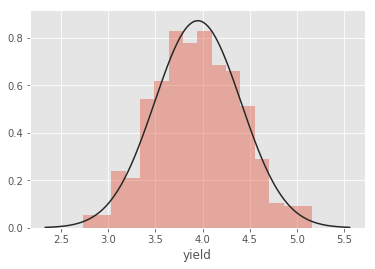

In [39]:
sns.distplot(wheat_data['yield'], kde=False, fit=norm)

### 降雨量分布

考察宾夕法尼亚州 Reading 市 1863 年至 2006 年的降雨量数据。降雨量数据呈整体分布。

In [44]:
precipitation_data = pd.read_csv('data/降雨量数据.csv', index_col='year')
precipitation_data.columns=['precipitation']
precipitation_data.head()

,precipitation
year,
1863,47.73
1864,39.14
1865,50.46
1866,42.10
1867,49.83


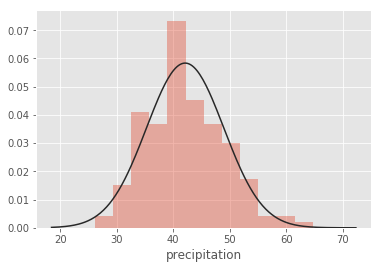

In [45]:
sns.distplot(precipitation_data['precipitation'], kde=False, fit=norm)

### 家蝇翅膀长度

1955 年时，R.R. Sokal 和 P.E. Hunter 测量了家蝇的翅膀长度。发现翅膀长度呈正态分布。

In [46]:
wing_data = pd.read_csv('data/家蝇翅膀长度数据.csv')
wing_data.columns=['length']
wing_data.head()

,length
0,36
1,37
2,38
3,38
4,39


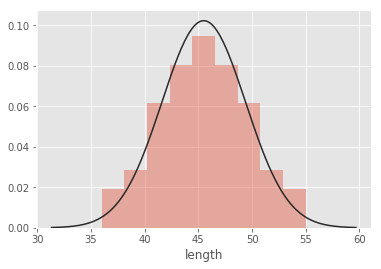

In [49]:
sns.distplot(wing_data['length'], kde=False, fit=norm)

通常，由于许多相互独立的因素累加作用而产生的变量将呈正态分布。

## 2 正态分布函数的图像

In [50]:
# 定义服从均值为 1，标准差为 2 正态分布随机变量
X = norm(loc=1, scale=2)

### 正态分布的概率密度函数图像

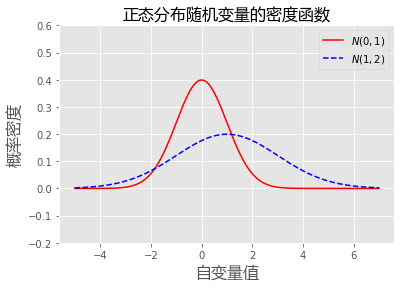

In [58]:
# 正态分布的概率密度函数
x = np.arange( -5.0, 7.0, 0.01 )

pyplot.plot( x, norm(0,1).pdf(x), 'r', label='$N(0,1)$')
pyplot.plot( x, X.pdf(x), 'b--', label='$N(1,2)$')

# 设置画图范围
pyplot.ylim( -0.2, 0.6 )

pyplot.title('正态分布随机变量的密度函数', fontproperties=cn_font)
pyplot.xlabel('自变量值', fontproperties=cn_font)
pyplot.ylabel('概率密度', fontproperties=cn_font)
pyplot.legend()
pyplot.show()

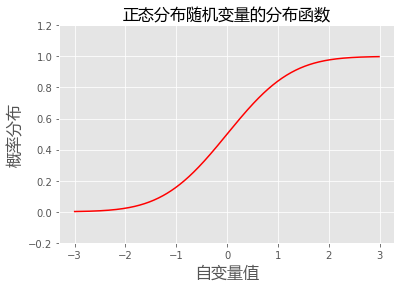

In [60]:
# 正态分布的累积分布函数

x = np.arange( -3.0, 3.0, 0.01 )

pyplot.figure()
pyplot.plot( x, norm(0,1).cdf( x ), 'r' )

# 设置画图范围
pyplot.ylim( -0.2, 1.2 )

pyplot.title('正态分布随机变量的分布函数', fontproperties=cn_font)
pyplot.xlabel('自变量值', fontproperties=cn_font)
pyplot.ylabel('概率分布', fontproperties=cn_font)
pyplot.show()

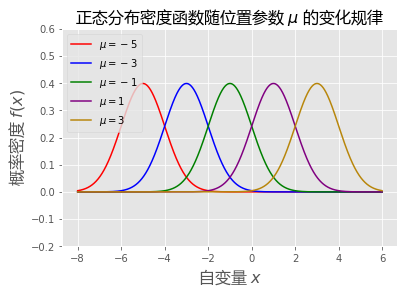

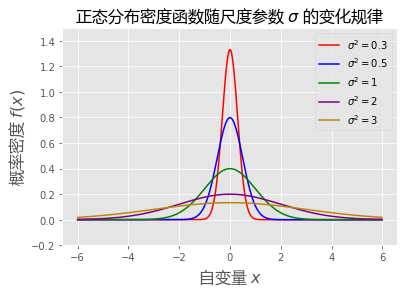

In [64]:
# 参数 $\mu$ 和 $\sigma^2$ 对密度函数的影响。

mycolor = [ "red", "blue", "green", "purple", "darkgoldenrod", "orange" ]
loc = [ -5, -3, -1, 1, 3, 5 ]

x = np.arange( -8.0, 6.0, 0.01 )

pyplot.figure()

for i in range( 5 ) :
    pyplot.plot( x, norm.pdf( x, loc[i], 1 ), color=mycolor[i], label='$\mu={}$'.format(loc[i]))

# 设置画图范围
pyplot.ylim( -0.2, 0.6 )

pyplot.title('正态分布密度函数随位置参数 $\mu$ 的变化规律', fontproperties=cn_font)
pyplot.xlabel('自变量 $x$', fontproperties=cn_font)
pyplot.ylabel('概率密度 $f(x)$', fontproperties=cn_font)
pyplot.legend()
pyplot.show()

scale = [ 0.3, 0.5, 1, 2, 3, 5 ]

x = np.arange( -6.0, 6.0, 0.01 )

pyplot.figure()

for i in range( 5 ) :
    pyplot.plot( x, norm.pdf( x, 0, scale[i] ), color=mycolor[i], label='$\sigma^2={}$'.format(scale[i]))

# 设置画图范围
pyplot.ylim( -0.2, 1.5 )

pyplot.title('正态分布密度函数随尺度参数 $\sigma$ 的变化规律', fontproperties=cn_font)
pyplot.xlabel('自变量 $x$', fontproperties=cn_font)
pyplot.ylabel('概率密度 $f(x)$', fontproperties=cn_font)
pyplot.legend()
pyplot.show()

# 指数模型

## 1 指数分布的图像

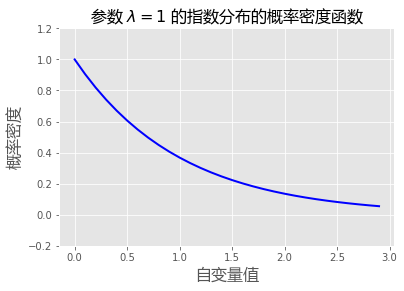

In [5]:
from scipy.stats import expon

# 生成一个服从指数分布的随机变量
X = expon()

x = np.arange(0, 3, 0.1)

pyplot.figure()

# 画指数分布的概率密度函数的图像
pyplot.plot(x, X.pdf(x), 'b-', lw=2)

pyplot.ylim( -0.2, 1.2)

pyplot.title('参数 $\lambda = 1$ 的指数分布的概率密度函数', fontproperties=cn_font)
pyplot.xlabel('自变量值', fontproperties=cn_font)
pyplot.ylabel('概率密度', fontproperties=cn_font)
pyplot.show()

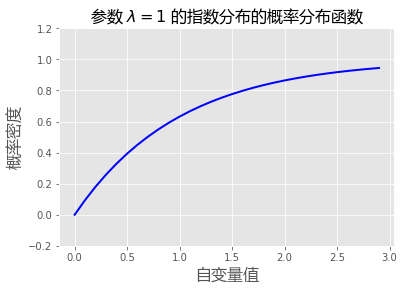

In [6]:
pyplot.figure()

# 指数分布的概率分布函数
pyplot.plot(x, X.cdf(x), 'b-', lw=2)

# 设置画图范围
pyplot.ylim( -0.2, 1.2)

pyplot.title('参数 $\lambda = 1$ 的指数分布的概率分布函数', fontproperties=cn_font)
pyplot.xlabel('自变量值', fontproperties=cn_font)
pyplot.ylabel('概率密度', fontproperties=cn_font)
pyplot.show()

参数 $\lambda$ 对指数函数图像的影响

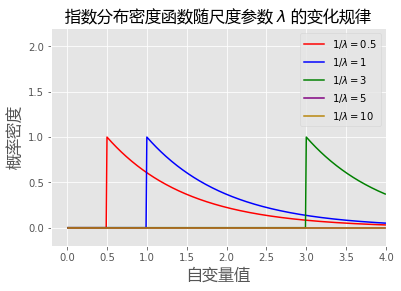

In [11]:
x = np.arange(0.01, 4.0, 0.01)
mycolor = ["red", "blue", "green", "purple", "darkgoldenrod"]
lambdas = [0.5, 1, 3, 5, 10]

pyplot.figure()

for i in range( 5 ):
    X = expon(lambdas[i])
    pyplot.plot( x, X.pdf(x), color=mycolor[i], label='$1/\lambda = $' + str(scale[i]) )

# 设置画图范围
pyplot.xlim( -0.2, 4.0 )
pyplot.ylim( -0.2, 2.2 )

pyplot.legend()

pyplot.title('指数分布密度函数随尺度参数 $\lambda$ 的变化规律', fontproperties=cn_font)
pyplot.xlabel('自变量值', fontproperties=cn_font)
pyplot.ylabel('概率密度', fontproperties=cn_font)
pyplot.show()